# Exercício 8 de Análise de Componentes Independentes
Pedro Bandeira de Mello Martins

CPE 782 - Análise de Componentes Independentes



Análise feita para 100 amostras

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv
from scipy.cluster.vq import whiten
import pandas as pd
from pandas.plotting import scatter_matrix
from scipy.stats import entropy, chi2_contingency, shapiro

%matplotlib inline
from evaluation import calculateNegentropy, kde_entropy, KLdivergence, resultsTable, plot_MutualInformation
from ICAfunctions import cichocki_Feedback, cichocki_Feedforward, NPCA_RLS

#Notes:
#SHAPIRO: The algorithm used is described in [R634] but censoring parameters as 
#        described are not implemented. For N > 5000 the W test statistic is 
#        accurate but the p-value may not be.

In [2]:
learning_rate = 1e-6
gaussian_distribution = np.random.normal(0,1,1000)
shapiro(np.random.uniform(-1,1,1000))

(0.953140139579773, 2.521336504312274e-17)

In [3]:
filePath = 'https://raw.githubusercontent.com/micaelverissimo/ICA/master/EighthMixture100Stats.txt'
distDataFrame = pd.read_table(filePath, delimiter = '\s+', header = None)
mixtures = distDataFrame.values
print(distDataFrame.T.head())

          0              1         2          3         4
0  0.785424      12.777850  0.682670  13.435324  3.561111
1  0.842213  211467.214344  0.327126   1.918556  4.028181
2  0.185441       1.816125  0.298350   0.617460  1.095587
3  3.795056     354.440279  2.568090   0.822998  2.919371
4  2.175962       5.305139  0.395776   1.536879  3.468964


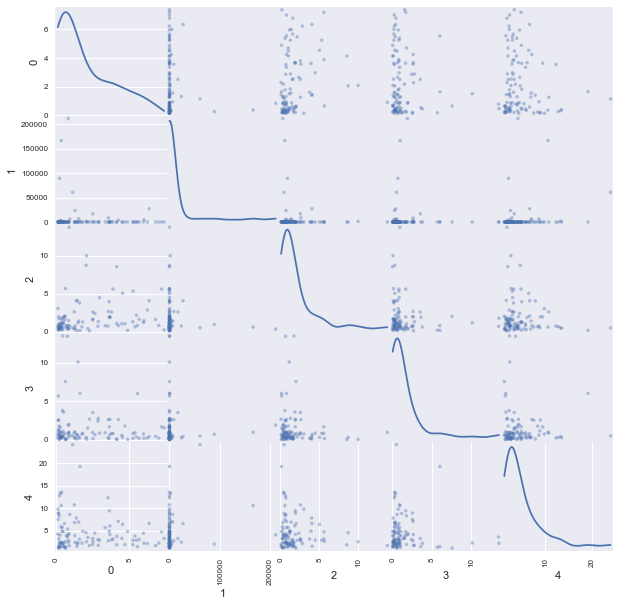

In [4]:
scatter_matrix(distDataFrame.T, alpha=0.4, diagonal = 'kde', figsize = (10,10))
plt.show()

In [5]:
resultsTable(mixtures)

Data,Negentropy,KL Divergence,Shapiro-Wilk test W,Shapiro-Wilk test P_value
0,0,1.7871,0.8537,1.6325e-08
1,1.4832,2.8684,0.2337,1.782e-20
2,0.9543,20.8049,0.6739,1.3836e-13
3,1.2144,1.8841,0.5574,7.1617e-16
4,0.7873,1.5478,0.7522,1.0718e-11


## NPCA-RLS Algorithm

In [6]:
[yNPCA, WNPCA] = NPCA_RLS(mixtures,runs = 1)

Execution time: 0.020502328872680664 seconds


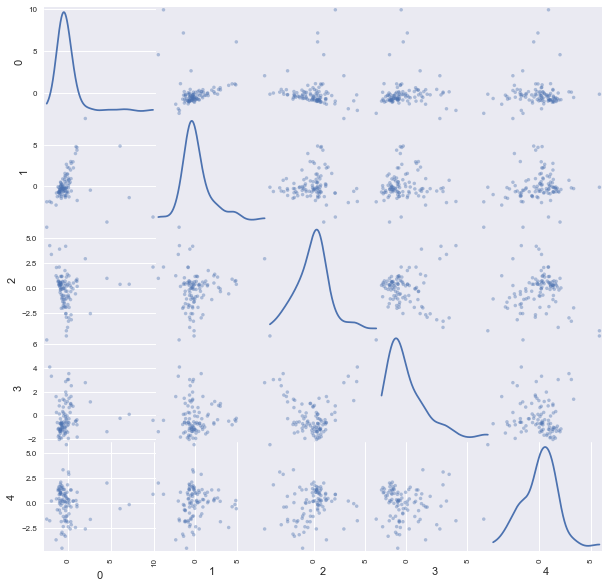

In [7]:
scatter_matrix(pd.DataFrame(yNPCA.T), alpha = 0.4, diagonal = 'kde', figsize = (10,10))
plt.show()

Data,Negentropy,KL Divergence,Shapiro-Wilk test W,Shapiro-Wilk test P_value
0,0.7131,1.4438,0.5937,3.2741e-15
1,0.5914,0.9657,0.8665,5.0981e-08
2,0.0239,7.7454,0.9556,0.0019771
3,0.2976,0.8217,0.841,5.5726e-09
4,0.3126,0.1027,0.9707,0.024827


C:\Users\Pedro\Anaconda3\lib\site-packages\statsmodels\sandbox\distributions\mv_measures.py:47: RuntimeWarning: invalid value encountered in sqrt
  mi_normed = np.sqrt(1. - np.exp(-2 * mi))


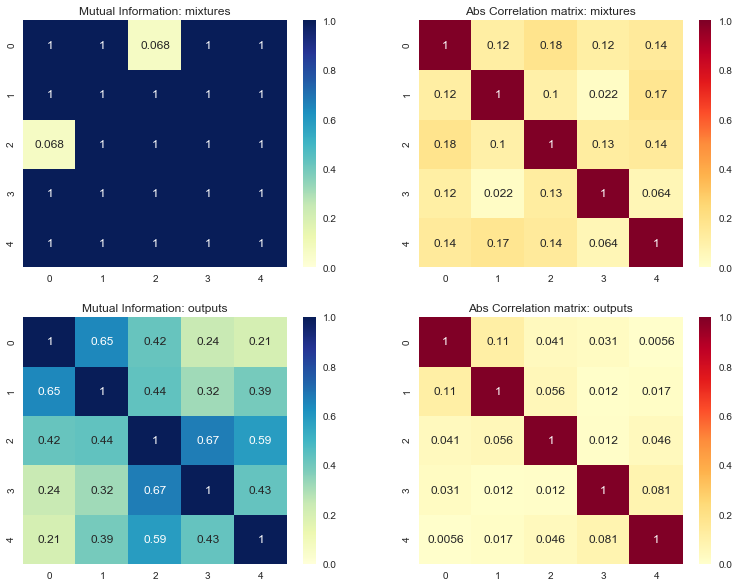

In [8]:
resultsTable(yNPCA)
plot_MutualInformation(mixtures, y = yNPCA, KDE = True)

## Chichocki-Unbehauen Algorithm Feedback network

In [9]:
[yFeedback, WFeedback] = cichocki_Feedback(mixtures, learningRate = 1e-3, decayRate = 1e-7, runs  = 1) 

Execution time: 0.015498638153076172 seconds


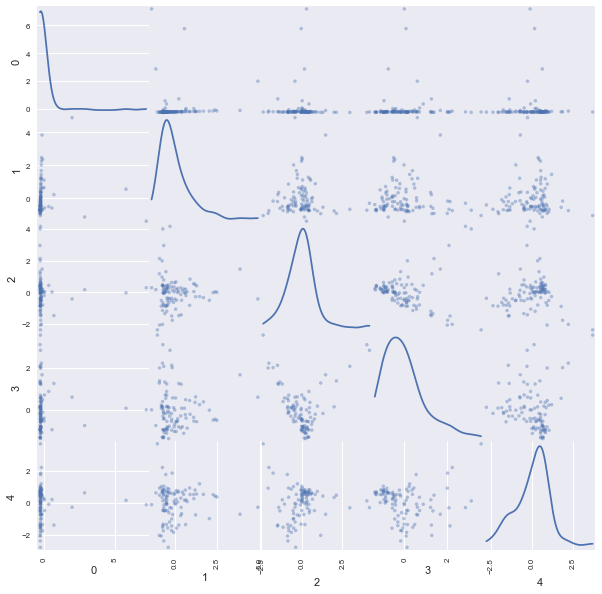

In [10]:
scatter_matrix(pd.DataFrame(yFeedback.T), alpha = 0.4, diagonal = 'kde', figsize = (10,10))
plt.show()

Data,Negentropy,KL Divergence,Shapiro-Wilk test W,Shapiro-Wilk test P_value
0,1.7963,3.1462,0.2462,2.5023e-20
1,0.3351,0.8948,0.784,8.2285e-11
2,0.321,0.352,0.8822,2.2503e-07
3,0.1263,0.6784,0.8988,1.2482e-06
4,0.3839,0.3647,0.9468,0.00051322


C:\Users\Pedro\Anaconda3\lib\site-packages\statsmodels\sandbox\distributions\mv_measures.py:47: RuntimeWarning: invalid value encountered in sqrt
  mi_normed = np.sqrt(1. - np.exp(-2 * mi))


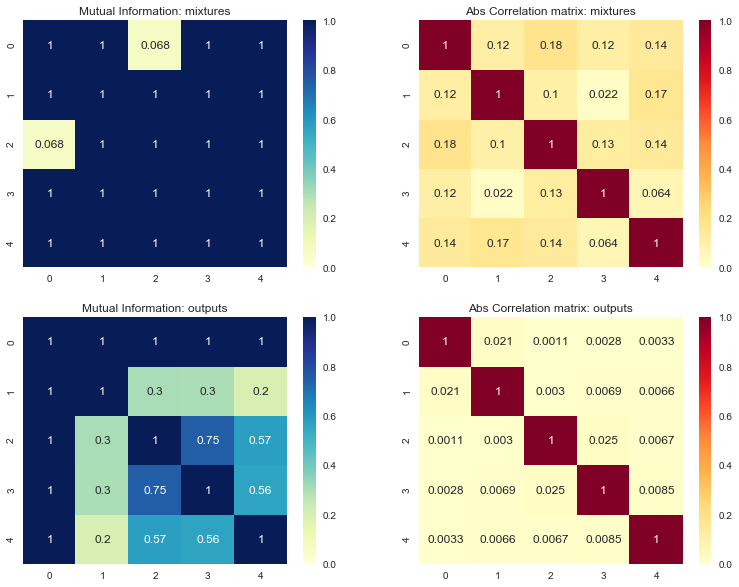

In [11]:
resultsTable(yFeedback)
plot_MutualInformation(mixtures, y = yFeedback, KDE = True)

## Chichocki-Unbehauen Algorithm Feedforward network

In [12]:
[yFeedforward, WFeedforward] = cichocki_Feedforward(mixtures, learningRate = 1e-8, runs = 1)

Execution time: 0.017001867294311523 seconds


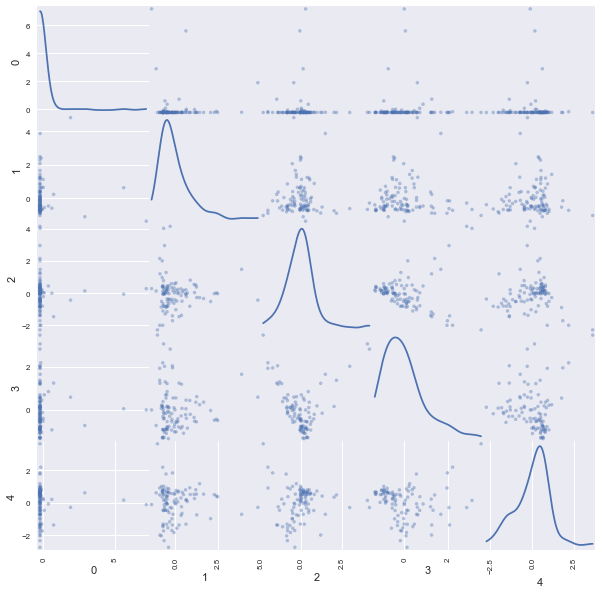

In [13]:
scatter_matrix(pd.DataFrame(yFeedforward.T), alpha = 0.4, diagonal = 'kde', figsize = (10,10))
plt.show()

Data,Negentropy,KL Divergence,Shapiro-Wilk test W,Shapiro-Wilk test P_value
0,1.3789,4.3066,0.2337,1.782e-20
1,0.3705,1.6228,0.7824,7.3948e-11
2,0.4224,0.4214,0.8755,1.1741e-07
3,0.1495,0.5121,0.8978,1.1167e-06
4,0,0.3838,0.9466,0.00049838


C:\Users\Pedro\Anaconda3\lib\site-packages\statsmodels\sandbox\distributions\mv_measures.py:47: RuntimeWarning: invalid value encountered in sqrt
  mi_normed = np.sqrt(1. - np.exp(-2 * mi))


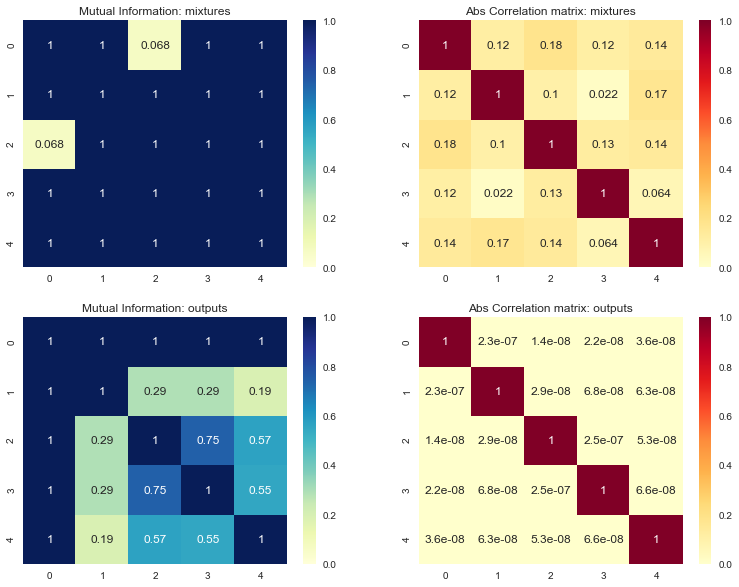

In [14]:
resultsTable(yFeedforward)
plot_MutualInformation(mixtures, y = yFeedforward, KDE = True)

# Fontes conhecidas

In [15]:
filePathSource = 'https://raw.githubusercontent.com/micaelverissimo/ICA/master/Mixture_keys/EighthSource100Stats.txt'
distDataFrameSources = pd.read_table(filePathSource, delimiter = '\s+', header = None)
mixtures = distDataFrame.values
print(distDataFrame.shape)
distDataFrame.T.head()

(5, 100)


,0,1,2,3,4
0,0.785424,12.777850,0.682670,13.435324,3.561111
1,0.842213,211467.214344,0.327126,1.918556,4.028181
2,0.185441,1.816125,0.298350,0.617460,1.095587
3,3.795056,354.440279,2.568090,0.822998,2.919371
4,2.175962,5.305139,0.395776,1.536879,3.468964


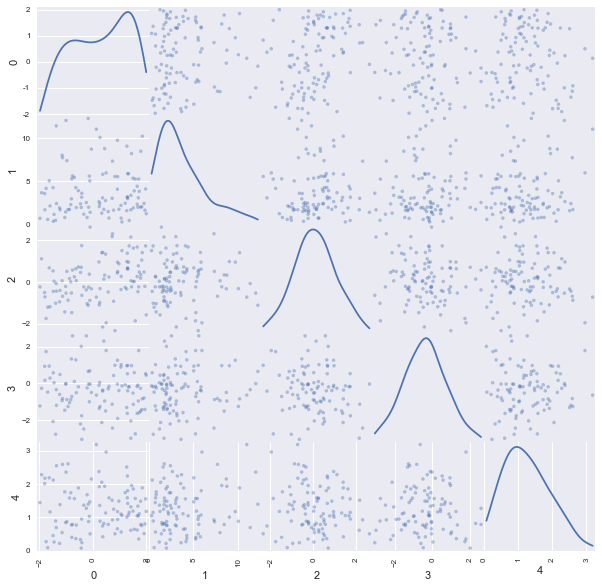

In [16]:
scatter_matrix(distDataFrameSources.T, alpha=0.4, diagonal = 'kde', figsize = (10,10))
plt.show()

## NPCA-RLS

(5, 100) (5, 100)
[[ 1.48606036  1.11875051  0.67197464  0.9420642   1.00125867]
 [ 0.58080368  1.52904521  0.57447349  0.7701121   0.81833787]
 [ 2.82114828  1.38312646  0.24660718  1.7810226   1.07319642]
 [ 1.86783042  1.7615844   0.33030498  2.15686904  0.23394363]
 [ 1.09992244  1.2431906   0.21718492  1.22477964  0.28902671]]


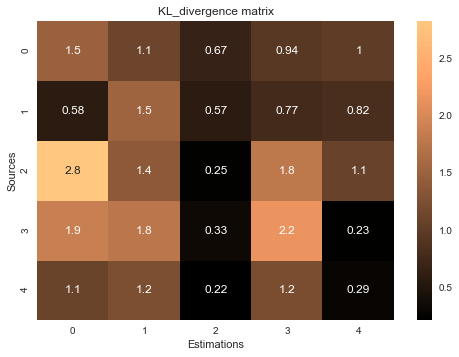

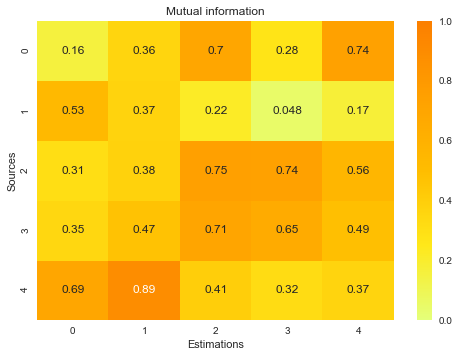

In [18]:
from evaluation import KLmatrix, MImatrix
KLmatrix(distDataFrameSources.values,yNPCA)
MImatrix(distDataFrameSources.values,yNPCA)

## Chichocki-Unbehauen Algorithm Feedback network

(5, 100) (5, 100)
[[  5.93503613   1.14078247   0.83819921   0.66061181   1.082515  ]
 [  3.68424518   1.54327886   0.56253891   0.08498256   0.72406456]
 [ 13.93471118   2.70440721   2.14898744   0.60099265   1.28481374]
 [ 10.7444932    4.49576826   0.52931589   0.50466239   0.35574865]
 [  7.00532865   2.51537682   0.28135307   0.15943646   0.31045559]]


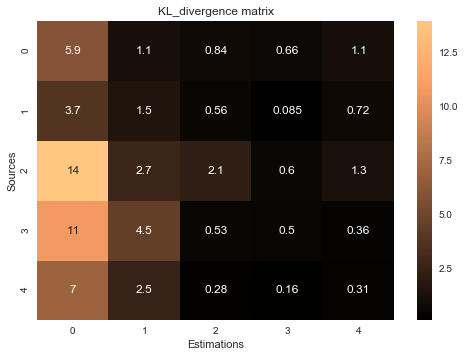

C:\Users\Pedro\Anaconda3\lib\site-packages\statsmodels\sandbox\distributions\mv_measures.py:47: RuntimeWarning: invalid value encountered in sqrt
  mi_normed = np.sqrt(1. - np.exp(-2 * mi))


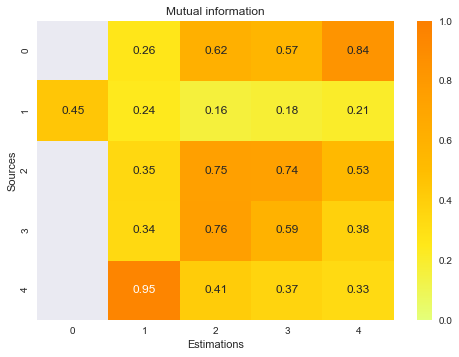

In [19]:
KLmatrix(distDataFrameSources.values,yFeedback)
MImatrix(distDataFrameSources.values,yFeedback)

## Chichocki-Unbehauen Algorithm Feedforward network

(5, 100) (5, 100)
[[  2.29611669   1.02559213   0.84012166   0.66061181   1.082515  ]
 [  3.68479865   1.54630905   0.56496447   0.09734315   0.72406456]
 [ 13.93778601   2.67172732   2.16818915   0.59779197   1.28544502]
 [ 10.74670708   4.49814207   0.53127547   0.52082421   0.35574865]
 [  7.00662008   2.51578983   0.2827064    0.17442045   0.31045559]]


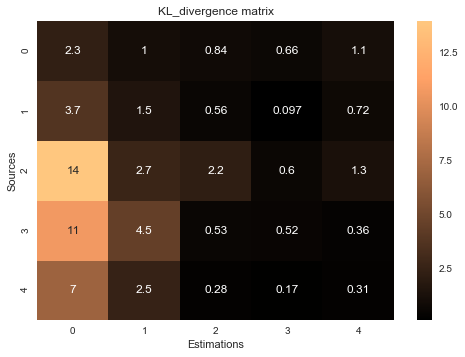

C:\Users\Pedro\Anaconda3\lib\site-packages\statsmodels\sandbox\distributions\mv_measures.py:47: RuntimeWarning: invalid value encountered in sqrt
  mi_normed = np.sqrt(1. - np.exp(-2 * mi))


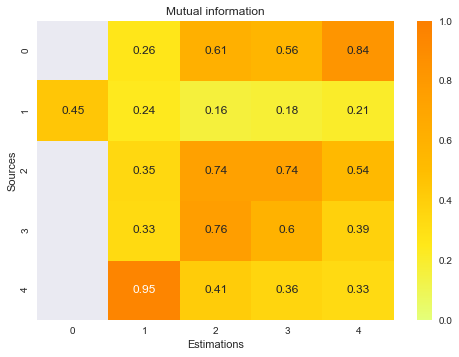

In [20]:
KLmatrix(distDataFrameSources.values,yFeedforward)
MImatrix(distDataFrameSources.values,yFeedforward)